# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

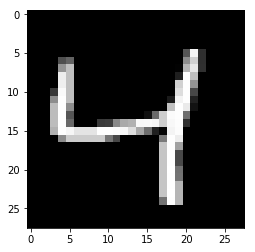

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name= 'inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name= 'targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Mean of the loss
cost = tf.reduce_mean(loss)


# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost) 

## Training

In [5]:
# Create the session
sess = tf.Session()
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6951
Epoch: 1/20... Training loss: 0.6913
Epoch: 1/20... Training loss: 0.6874
Epoch: 1/20... Training loss: 0.6830
Epoch: 1/20... Training loss: 0.6782
Epoch: 1/20... Training loss: 0.6723
Epoch: 1/20... Training loss: 0.6652
Epoch: 1/20... Training loss: 0.6568
Epoch: 1/20... Training loss: 0.6476
Epoch: 1/20... Training loss: 0.6365
Epoch: 1/20... Training loss: 0.6244
Epoch: 1/20... Training loss: 0.6094
Epoch: 1/20... Training loss: 0.5950
Epoch: 1/20... Training loss: 0.5815
Epoch: 1/20... Training loss: 0.5634
Epoch: 1/20... Training loss: 0.5479
Epoch: 1/20... Training loss: 0.5301
Epoch: 1/20... Training loss: 0.5138
Epoch: 1/20... Training loss: 0.4940
Epoch: 1/20... Training loss: 0.4781
Epoch: 1/20... Training loss: 0.4599
Epoch: 1/20... Training loss: 0.4417
Epoch: 1/20... Training loss: 0.4307
Epoch: 1/20... Training loss: 0.4122
Epoch: 1/20... Training loss: 0.4067
Epoch: 1/20... Training loss: 0.3910
Epoch: 1/20... Training loss: 0.3720
E

Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1945
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1818
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1858
E

Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1627
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1597
E

Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1438
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1440
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1415
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1361
E

Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1244
E

Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1104
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1112
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1125
E

Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1090
E

Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1026
E

Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0957
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1058
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1040
E

Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0959
E

Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0920
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0938
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1002
E

Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0914
E

Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0900
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.1017
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0997
Epoch: 10/20... Training loss: 0.1003
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0899
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0881
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0867
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0895
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0906
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0990
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0892
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0898
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0885
Epoch: 13/20... Training loss: 0.0903
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0981
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0891
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0983
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0888
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0981
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0888
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0977
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0940


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

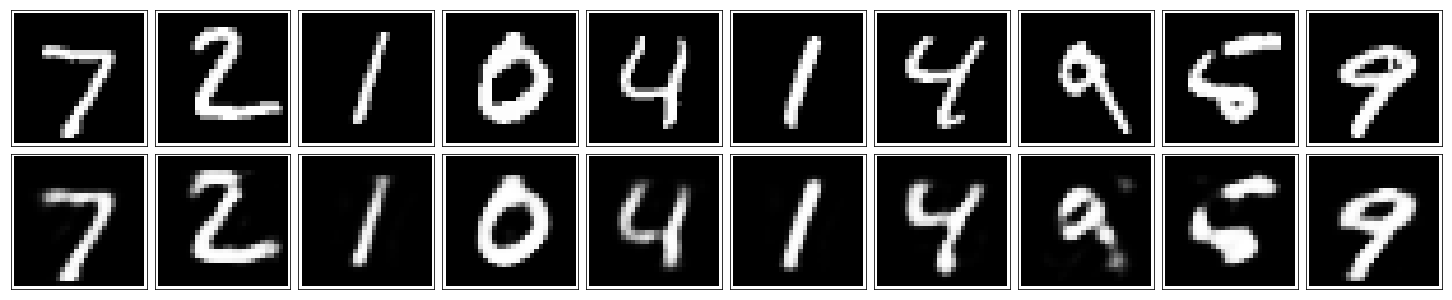

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.